# Data Analyst Nanodegree Project 0 #
  By Kruthika Krishnamurthy

*In this project, We will analyze local and global temperature data and compare the temperature trends where I live to overall global temperature trends.* 
 


#### Step 1: Fetching data and converting it to CSV

Downloaded all the 3 datasets using the following SQL Queries.

```SQL
SELECT * FROM city_data;
``` 

```SQL
SELECT * FROM global_data;
```

```SQL
SELECT * FROM city_list;
```

All the *.csv are added to the workspace "Project0" folder. 
 


#### Step 2: Importing the data 
Used Pandas, matplotlib and seaborn for data analysis.


In [72]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pdb 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'#to have high resolution image

Automatic pdb calling has been turned ON


In [52]:
global_data = pd.read_csv("global_data.csv")
city_data = pd.read_csv("city_data.csv")
city_list = pd.read_csv("city_list.csv")

#### Step 3: Preview Data

In [53]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [54]:
city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [55]:
city_list.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [56]:
# filltering banglore data from city data
city_blr = city_data[city_data["city"] == "Bangalore"]
city_blr.head()

,year,city,country,avg_temp
6367,1796,Bangalore,India,24.49
6368,1797,Bangalore,India,25.18
6369,1798,Bangalore,India,24.65
6370,1799,Bangalore,India,24.81
6371,1800,Bangalore,India,24.85


#### Step 4 : Visualizing Data

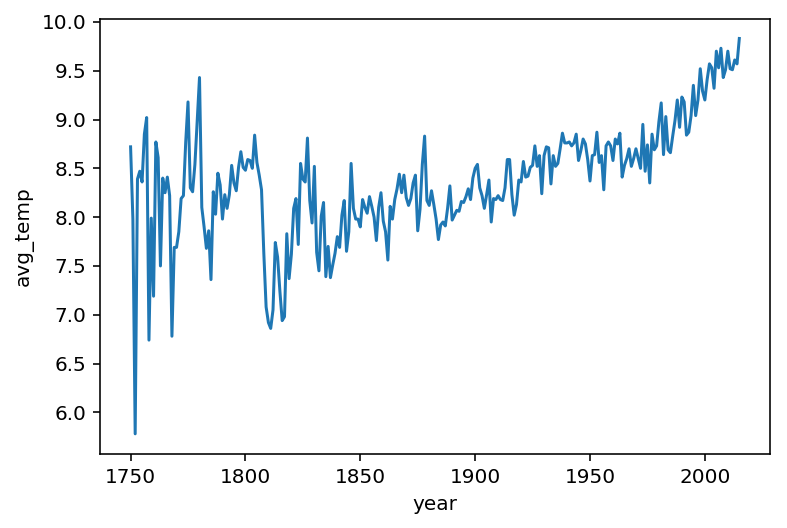

In [57]:
# plotting graph for global data 
sns.lineplot(x = "year",y = "avg_temp",data = global_data)

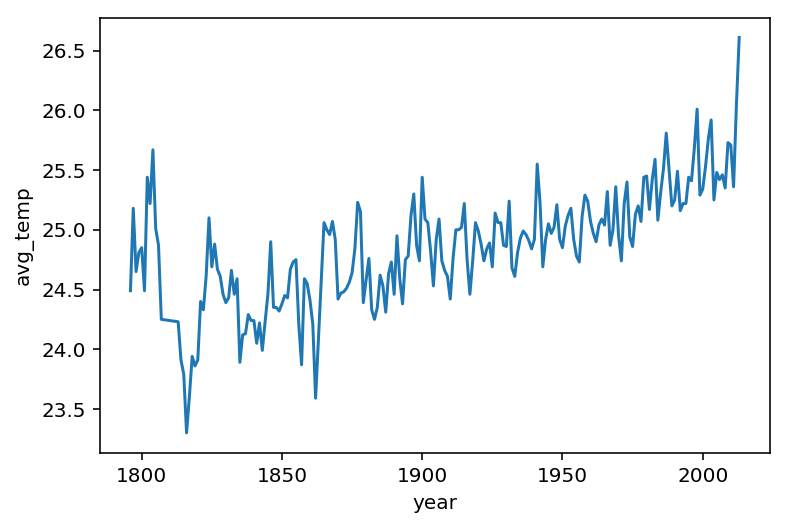

In [58]:
# plotting graph for Banglore city
sns.lineplot(x = "year", y = "avg_temp",data = city_blr)

In [59]:
# Calculated rolling average for global data 
global_data=global_data.assign(rolling_gavg=global_data['avg_temp'].rolling(5).mean())
global_data.head()

,year,avg_temp,rolling_gavg
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,7.868


In [60]:
# Calculated rolling average for Bangalore data 
city_blr=city_blr.assign(rolling_gavg=city_blr['avg_temp'].rolling(5).mean())
city_blr.head()

,year,city,country,avg_temp,rolling_gavg
6367,1796,Bangalore,India,24.49,NaN
6368,1797,Bangalore,India,25.18,NaN
6369,1798,Bangalore,India,24.65,NaN
6370,1799,Bangalore,India,24.81,NaN
6371,1800,Bangalore,India,24.85,24.796


In [62]:
#finding missing values in local data for average and rolling average temperatures and filling it with respective median 
sum(city_blr["avg_temp"].isna())
median=city_blr["avg_temp"].median()
city_blr["avg_temp"].fillna(median,inplace=True)
median1=city_blr["rolling_gavg"].median()
city_blr["rolling_gavg"].fillna(median1,inplace=True)

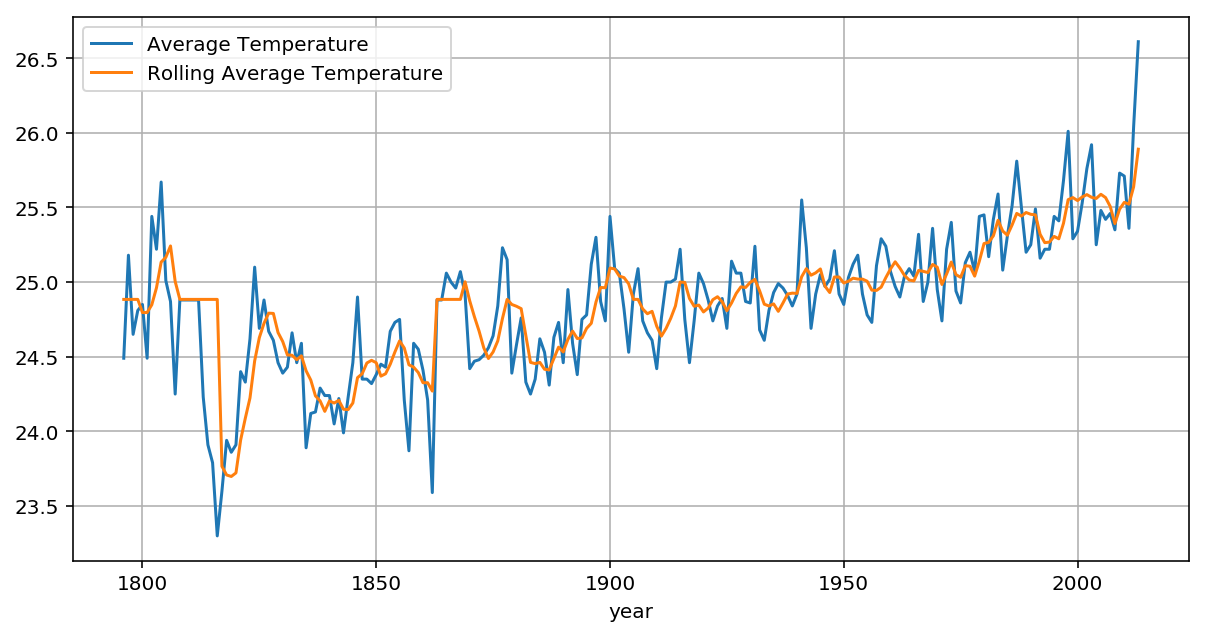

In [63]:
#plotting graph for average temperature vs rolling average temperature of bangalore data
city_blr.plot(x="year", y= ['avg_temp','rolling_gavg'],figsize=(10,5),grid=True,label = ['Average Temperature','Rolling Average Temperature'])


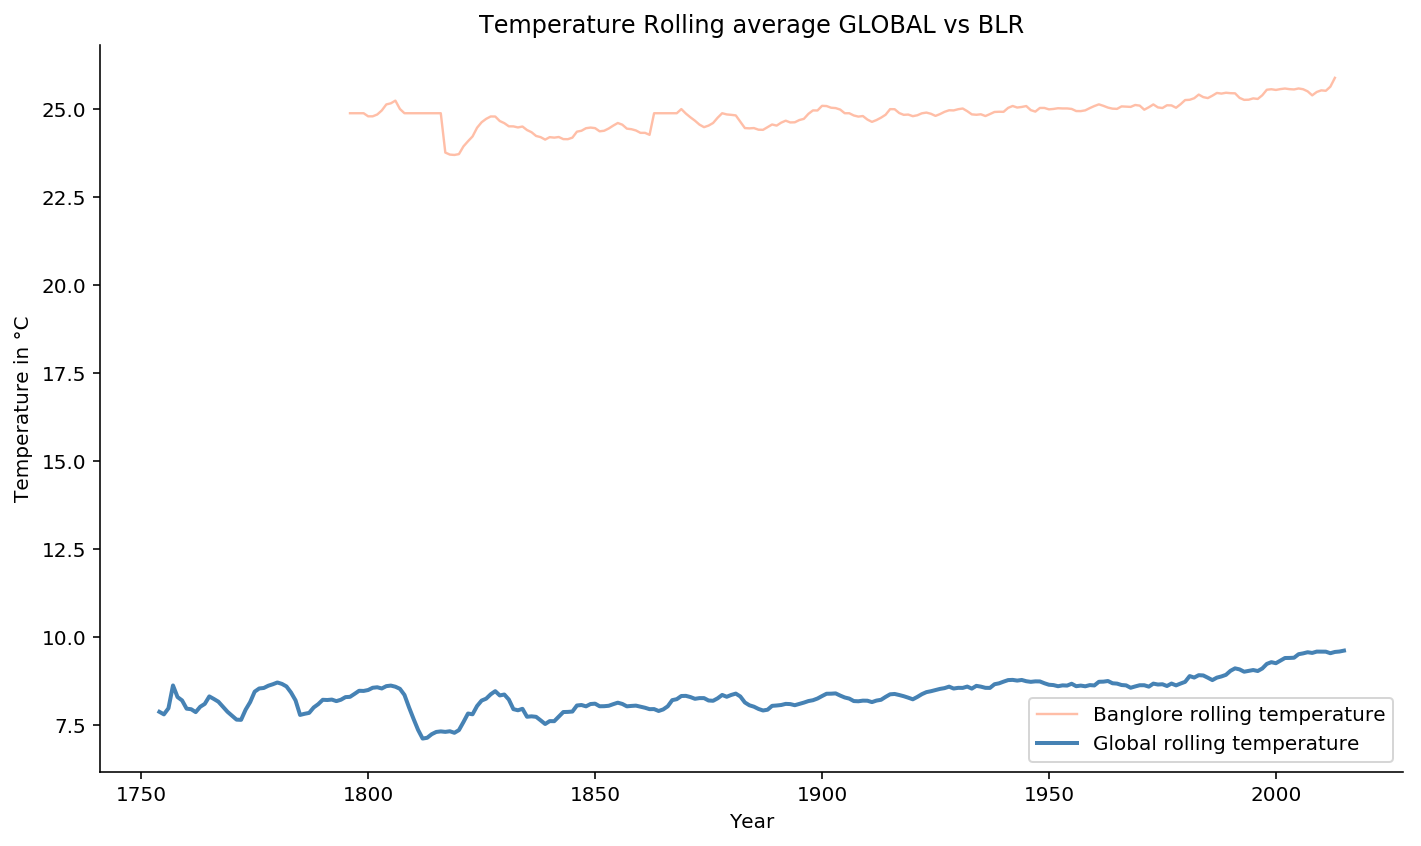

In [70]:
#graph for rolling average temperature for global and bangalore data
#create a matplotlib figure and axes
fig, ax = plt.subplots(figsize = (10,6))

#plot the global data with a lineplot
sns.lineplot(x = "year", y = "rolling_gavg", data = city_blr , label = "Banglore rolling temperature", alpha = 0.5,
             color = "coral", lw = 1.2)
sns.lineplot(x = "year", y = "rolling_gavg", data = global_data , label = "Global rolling temperature",
             color = "steelblue", lw = 2) 
 #set the y label of the plot
ax.set_ylabel("Temperature in °C")
#set the x label of the plot
ax.set_xlabel("Year")
#set the title of the plot
ax.set_title("Temperature Rolling average GLOBAL vs BLR")
#disable the right and top spine for better look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 
#tighten the plot layout
plt.tight_layout()

#show the plot (basically not necessary for jupyter but I always put it at the end)
plt.show()

## Summary ##
* *Bangalore average temperature is hotter than the global temperature and diffrence is consistent over years*
  *Banglore is about 13.5 degrees hotter than the global temperature *
 
*  *Banglore temperature always varied around 23 degree to 26 degrees whereas global temperature varied between 6 degree to 10 degree*
   *However both the temperatures are consistent in their variations*
   
*  *It can be observed that there is a sudden dip in global and local temperatures at the beginning of 19th century where both trends   decreased by about 1.5 degrees*
   
*  *To summarise, there is an overall increase in temperature over years in both globally and locally*